# Reinforcement Learning
# TP 2 - The Exploration-Exploitation Dilemma

Student: Pierre-Louis Guhur

# 1. Stochastic Multi-Armed Bandits on Simulated Data

## 1.1 Bernoulli bandit models

**A multi-armed bandit model is a collection of arms:
                                ```MAB = {Arm1, Arm2, ...,ArmK}```
Start by defining your own Bernoulli bandit model with K arms of means $p_1, . . . , p_K$**

In [44]:
from arms import *
import numpy as np
import matplotlib.pyplot as plt

K = 10
means = np.random.random(K)
MAB = [ArmBernoulli(m) for m in means]
assert(MAB[0].mean == means[0])

***1.* Write two functions
              `[rew,draws]=UCB1(T,MAB,...)` and `[rew,draws]=TS(T,MAB,...)`
simulating a bandit game of length $T$ with the UCB1 and Thompson Sampling strategy on the bandit model MAB: `rew` and `draws` are the sequence of the $T$ rewards obtained and of the $T$ the arms drawn.**

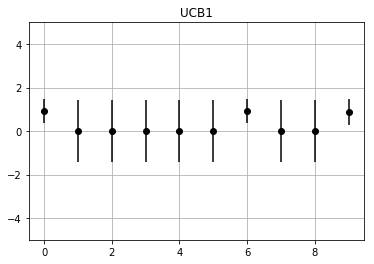

In [45]:
from numpy import sqrt, log 
from IPython.display import display, clear_output
import time

def _update_empirical_mean(mu, value, N):
    ''' Online update of the emperical mean '''
    return N/(N+1) * mu + 1/(N+1) * value


def _update_ucb(B, mu, N, t, rho=sqrt(3)):
    K = len(B)
    for i in range(K):
        B[i] = mu[i] + rho*sqrt(log(t)/N[i])
        

def plot_UCB1(B, mu, sleep=0.1):
    K = len(mu)
    plt.cla()
    ax = plt.gca()
    ylim = ax.get_ylim()
    plt.errorbar(x=range(K), y=mu, yerr=(B-mu), fmt='o', color='k')
    plt.grid()
#     plt.ylim(min(ylim[0], np.min(B-mu)), max(ylim[1], np.max(B-mu)))
    plt.ylim(-5, 5)
    plt.draw()
    plt.title("UCB1")
    time.sleep(sleep)
    display(plt.gcf(), display_id=True)
    clear_output(wait=True)
    
    
def UCB1(T, MAB, rho=sqrt(3), vis="all"):
    """The UCB1 algorithm starts with an initialization phase that draws each arm once, and for t ≥ K, chooses at time t + 1 arm
    $$A_{t+1} = argmax_{a\in{1,...,K }} = \hat{\mu}_a(t) + \rho_t \sqrt{\frac{\log t}{2N_a(t)}}$$
    """
    K = len(MAB) # number of arms
    mu = np.zeros(K) # empirical mean
    N = np.zeros(K) # number of times an arm was pulled
    B = np.zeros(K) # upper-confidence bound
    draws = np.zeros(K)
    rew = np.zeros(K)
    
    # initialisation
    for i in range(K):
        s = MAB[i].sample()
        mu[i] = _update_empirical_mean(0, s, 0)
        B[i] = mu[i] + 0
        N[i] += 1
        draws[i] = i
        rew[i] = s
    
    # steps
    for t in range(K, T+1):
        _update_ucb(B, mu, N, t, rho=rho)
        a = np.argmax(B)
        s = MAB[a].sample()
        mu[a] = _update_empirical_mean(mu[a], s, N[a])
        N[a] += 1
        draws[i] = a
        rew[i] = s
        
        if vis == "all":
            plot_UCB1(B, mu, sleep=1e-3)
        
    return rew, draws

rew, draws = UCB1(200, MAB)

array([9.57256377, 2.56003771, 6.19672294, 6.18745014, 6.73507624,
       2.25474143, 3.95660848, 9.10421926, 2.56676401, 9.06905084])